In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🗂️ Project Initilization

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df_del=pd.read_csv('/content/drive/MyDrive/data/ipl_deliveries.csv')

In [39]:
df_del.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


## 🗂️ Data Cleaning and Preparation

In [44]:
df_mat=pd.read_csv('/content/drive/MyDrive/data/ipl_matches_cleaned.csv')

In [45]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [46]:
# Select minimal columns
match_info = df_mat[['id', 'season', 'venue', 'city', 'date']].copy()

# Merge season, venue, city, date into df_del
df_del = df_del.merge(match_info, left_on='match_id', right_on='id', how='left')

# Drop duplicate 'id' column
df_del.drop(columns=['id'], inplace=True)

In [47]:
# Identify columns to keep and remove
columns_to_drop = ['season_x', 'venue_x', 'city_x', 'date_x']
df_del.drop(columns=columns_to_drop, inplace=True)

# Rename columns to remove _y suffix
df_del.rename(columns={
    'season_y': 'season',
    'venue_y': 'venue',
    'city_y': 'city',
    'date_y': 'date'
}, inplace=True)

In [49]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season,venue,city,date
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,1,legbyes,0,NaN,NaN,NaN,2008,"M Chinnaswamy Stadium, Bengaluru",Bangalore,2008-04-18
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,0,NaN,0,NaN,NaN,NaN,2008,"M Chinnaswamy Stadium, Bengaluru",Bangalore,2008-04-18
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,1,wides,0,NaN,NaN,NaN,2008,"M Chinnaswamy Stadium, Bengaluru",Bangalore,2008-04-18
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,0,NaN,0,NaN,NaN,NaN,2008,"M Chinnaswamy Stadium, Bengaluru",Bangalore,2008-04-18
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,0,NaN,0,NaN,NaN,NaN,2008,"M Chinnaswamy Stadium, Bengaluru",Bangalore,2008-04-18


In [50]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [51]:
df_del = df_del.drop_duplicates()

In [52]:
df_del['extras_type'] = df_del['extras_type'].fillna('None')
df_del['player_dismissed'] = df_del['player_dismissed'].fillna('None')
df_del['dismissal_kind'] = df_del['dismissal_kind'].fillna('None')
df_del['fielder'] = df_del['fielder'].fillna('None')

In [53]:
df_del['date'] = pd.to_datetime(df_del['date'])

In [54]:
df_del['is_boundary'] = df_del['batsman_runs'].isin([4, 6]).astype(int)

In [55]:
df_del['ball_number'] = df_del['over'] * 6 + df_del['ball']

In [56]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          260920 non-null  int64         
 1   inning            260920 non-null  int64         
 2   batting_team      260920 non-null  object        
 3   bowling_team      260920 non-null  object        
 4   over              260920 non-null  int64         
 5   ball              260920 non-null  int64         
 6   batter            260920 non-null  object        
 7   bowler            260920 non-null  object        
 8   non_striker       260920 non-null  object        
 9   batsman_runs      260920 non-null  int64         
 10  extra_runs        260920 non-null  int64         
 11  total_runs        260920 non-null  int64         
 12  extras_type       260920 non-null  object        
 13  is_wicket         260920 non-null  int64         
 14  play

## 🔍 Exploratory Data Analysis (EDA)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recommended plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

/tmp/ipython-input-60-2572832740.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=top_batters, palette='viridis')


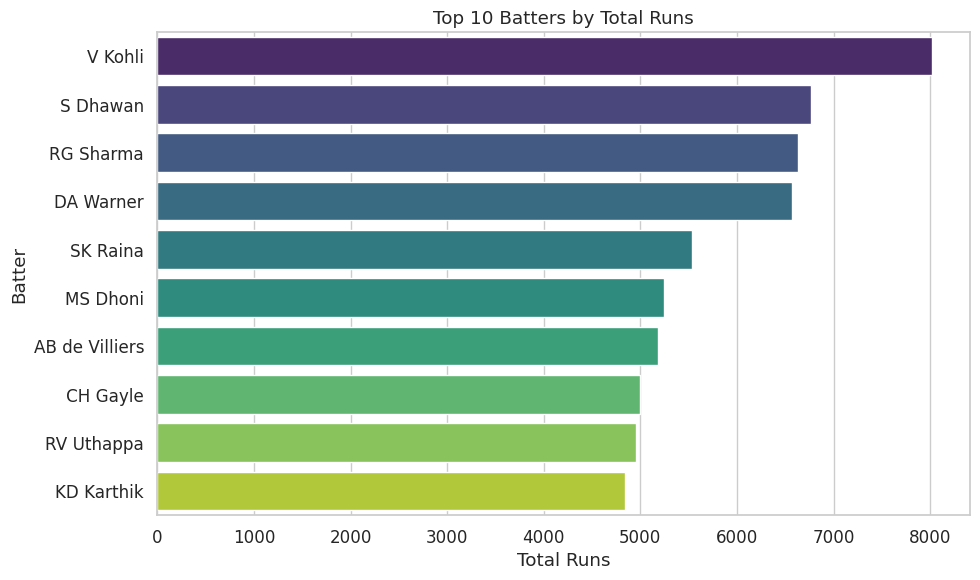

In [60]:
# Top 10 batters by total runs
top_batters = (
    df_del.groupby('batter')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(x='batsman_runs', y='batter', data=top_batters, palette='viridis')
plt.title("Top 10 Batters by Total Runs")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

/tmp/ipython-input-61-795109690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='match_id', data=matches_per_season, palette='cubehelix')


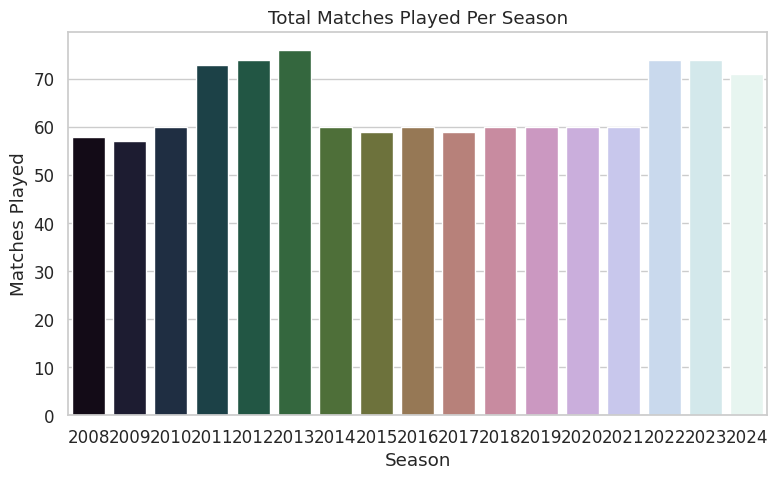

In [61]:
# Matches played per season
matches_per_season = df_del[['season', 'match_id']].drop_duplicates().groupby('season').count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='match_id', data=matches_per_season, palette='cubehelix')
plt.title("Total Matches Played Per Season")
plt.xlabel("Season")
plt.ylabel("Matches Played")
plt.tight_layout()
plt.show()

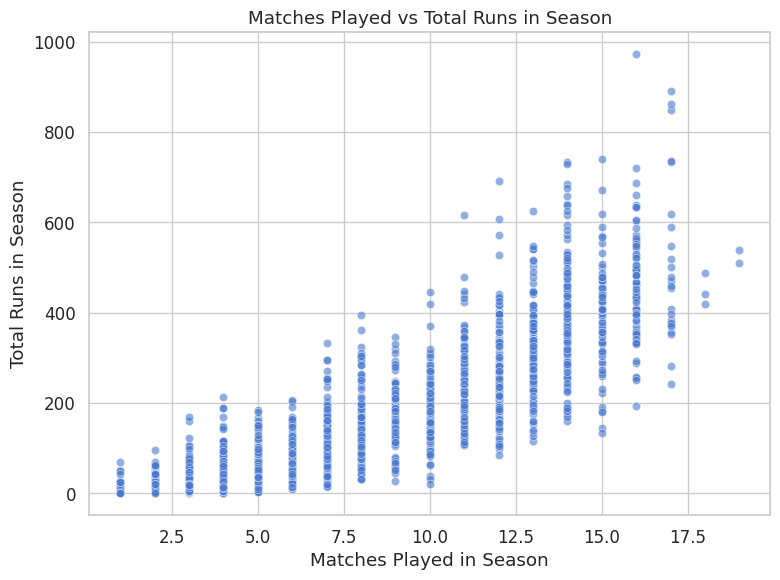

In [83]:
# Aggregate runs and matches played per player per season
agg_df = (
    df_del.groupby(['season', 'batter'])
    .agg(
        total_runs=('batsman_runs', 'sum'),
        matches_played=('match_id', pd.Series.nunique)
    )
    .reset_index()
)

# Scatter plot: Matches played vs Total Runs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='matches_played',
    y='total_runs',
    data=agg_df,
    alpha=0.6
)
plt.title('Matches Played vs Total Runs in Season')
plt.xlabel('Matches Played in Season')
plt.ylabel('Total Runs in Season')
plt.tight_layout()
plt.show()


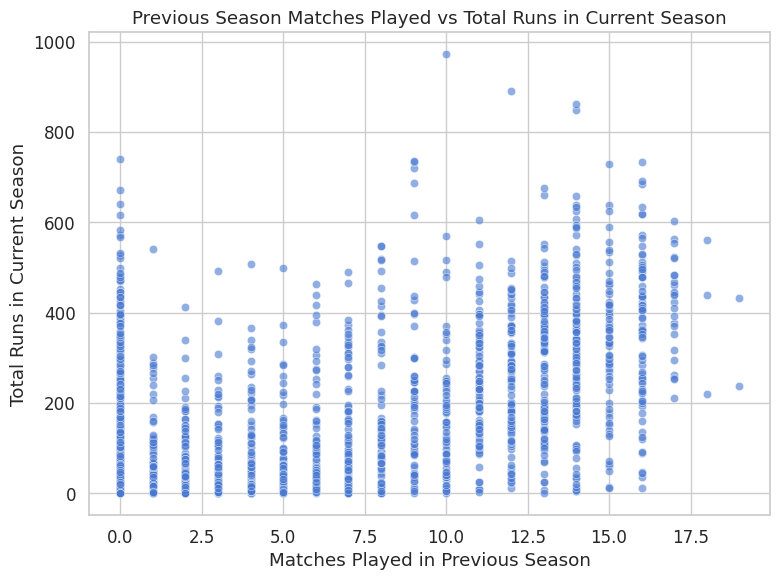

In [84]:
# Previous season matches played vs Total runs in current season
agg_df['previous_season'] = agg_df['season'] - 1
previous_season_matches = (
    agg_df[['previous_season', 'batter', 'matches_played']]
    .rename(columns={'previous_season': 'season', 'matches_played': 'previous_matches_played'})
)

# Merge to get previous season matches
agg_df = agg_df.merge(
    previous_season_matches,
    on=['season', 'batter'],
    how='left'
)
agg_df['previous_matches_played'] = agg_df['previous_matches_played'].fillna(0)

# Scatter plot: Previous season matches played vs Total Runs in current season
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='previous_matches_played',
    y='total_runs',
    data=agg_df,
    alpha=0.6
)
plt.title('Previous Season Matches Played vs Total Runs in Current Season')
plt.xlabel('Matches Played in Previous Season')
plt.ylabel('Total Runs in Current Season')
plt.tight_layout()
plt.show()


/tmp/ipython-input-64-1880646251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='match_id', y='venue', data=top_venues, palette='magma')


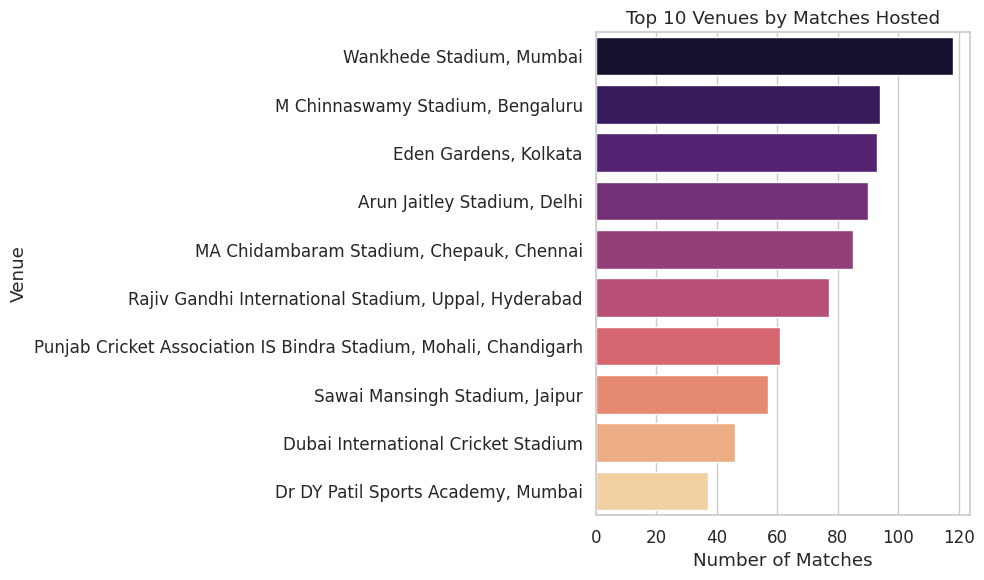

In [64]:
# Top venues by matches hosted
top_venues = (
    df_del[['venue', 'match_id']]
    .drop_duplicates()
    .groupby('venue')
    .count()
    .sort_values('match_id', ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(x='match_id', y='venue', data=top_venues, palette='magma')
plt.title("Top 10 Venues by Matches Hosted")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.tight_layout()
plt.show()

/tmp/ipython-input-65-2790858661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


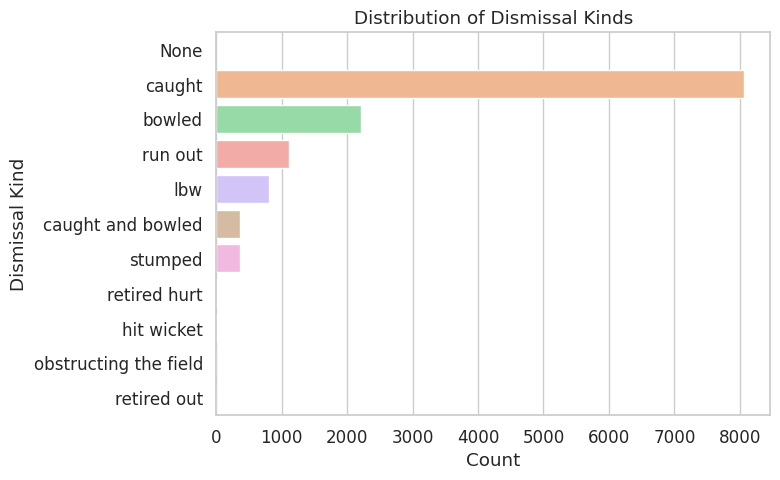

In [65]:
# Distribution of dismissal kinds
plt.figure(figsize=(8, 5))
sns.countplot(
    y='dismissal_kind',
    data=df_del[df_del['dismissal_kind'] != 'None'],
    order=df_del['dismissal_kind'].value_counts().index,
    palette='pastel'
)
plt.title("Distribution of Dismissal Kinds")
plt.xlabel("Count")
plt.ylabel("Dismissal Kind")
plt.tight_layout()
plt.show()

## 📊 Visualizations

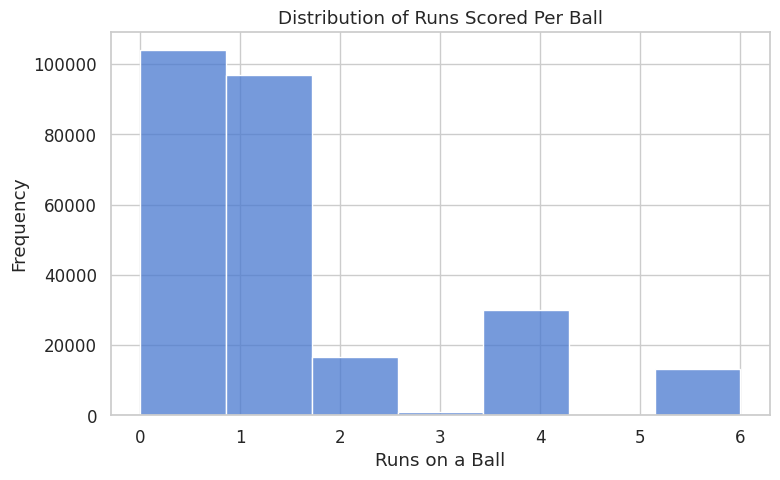

In [85]:
# Distribution of batsman_runs per ball
plt.figure(figsize=(8, 5))
sns.histplot(df_del['batsman_runs'], bins=7, kde=False)
plt.title("Distribution of Runs Scored Per Ball")
plt.xlabel("Runs on a Ball")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

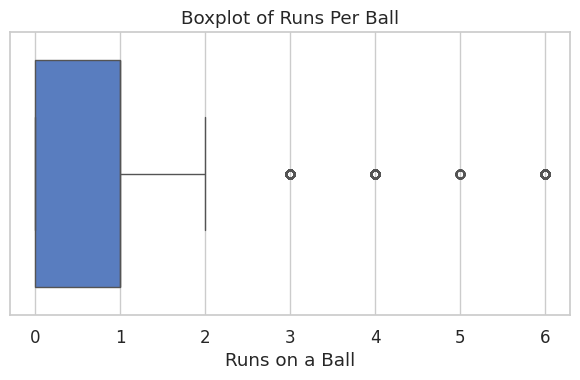

In [86]:
# Boxplot for outlier detection
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_del['batsman_runs'])
plt.title("Boxplot of Runs Per Ball")
plt.xlabel("Runs on a Ball")
plt.tight_layout()
plt.show()

In [66]:
# Lets calculate Home vs Away runs
team_home_city = {
    'Kolkata Knight Riders': 'Kolkata',
    'Chennai Super Kings': 'Chennai',
    'Mumbai Indians': 'Mumbai',
    'Royal Challengers Bangalore': 'Bangalore',
    'Delhi Daredevils': 'Delhi',
    'Kings XI Punjab': 'Mohali',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Deccan Chargers': 'Hyderabad',
    'Rajasthan Royals': 'Jaipur',
    'Gujarat Lions': 'Rajkot',
    'Pune Warriors': 'Pune',
    'Rising Pune Supergiants': 'Pune',
    'Lucknow Super Giants': 'Lucknow',
    'Gujarat Titans': 'Ahmedabad'
}


df_del['home_away'] = df_del.apply(
    lambda row: 'Home' if team_home_city.get(row['batting_team'], '') in row['city'] else 'Away',
    axis=1
)

agg_home_away = (
    df_del.groupby(['season', 'batter', 'home_away'])['batsman_runs']
    .sum()
    .reset_index()
)

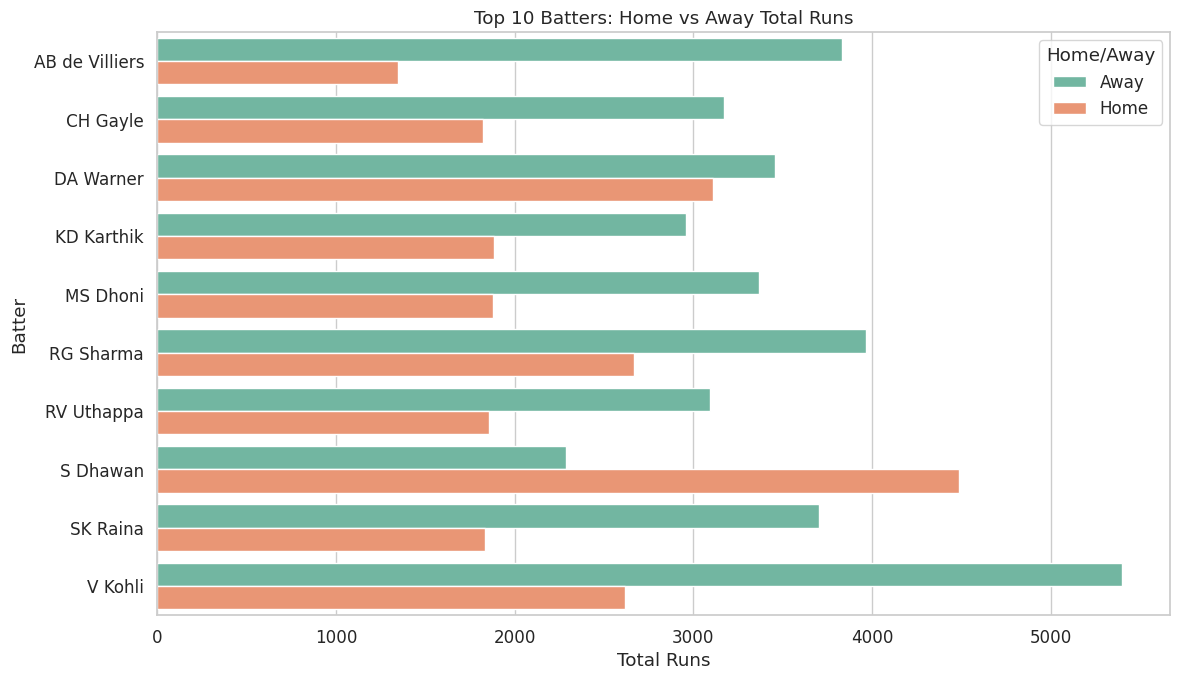

In [67]:
# Total home and away runs per batter
total_home_away = (
    agg_home_away.groupby(['batter', 'home_away'])['batsman_runs']
    .sum()
    .reset_index()
)

# Select top 10 batters by total runs
top_batters_list = (
    df_del.groupby('batter')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Filter for these batters
filtered = total_home_away[total_home_away['batter'].isin(top_batters_list)]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(
    data=filtered,
    x='batsman_runs',
    y='batter',
    hue='home_away',
    palette='Set2'
)
plt.title('Top 10 Batters: Home vs Away Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Home/Away')
plt.tight_layout()
plt.show()


In [68]:
# Lets calculate Home vs Away runs per match
matches_home_away = (
    df_del[['season', 'batter', 'match_id', 'home_away']]
    .drop_duplicates()
    .groupby(['season', 'batter', 'home_away'])
    .size()
    .reset_index(name='matches_played')
)


runs_home_away = (
    df_del.groupby(['season', 'batter', 'home_away'])['batsman_runs']
    .sum()
    .reset_index()
)


# Merge the runs and matches played dataframes
player_home_away_stats = pd.merge(
    runs_home_away,
    matches_home_away,
    on=['season', 'batter', 'home_away'],
    how='inner'
)

# Calculate runs per match
player_home_away_stats['runs_per_match'] = (
    player_home_away_stats['batsman_runs'] / player_home_away_stats['matches_played']
)

top_batters_list = (
    df_del.groupby('batter')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

filtered_stats = player_home_away_stats[player_home_away_stats['batter'].isin(top_batters_list)]


/tmp/ipython-input-69-3973329502.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


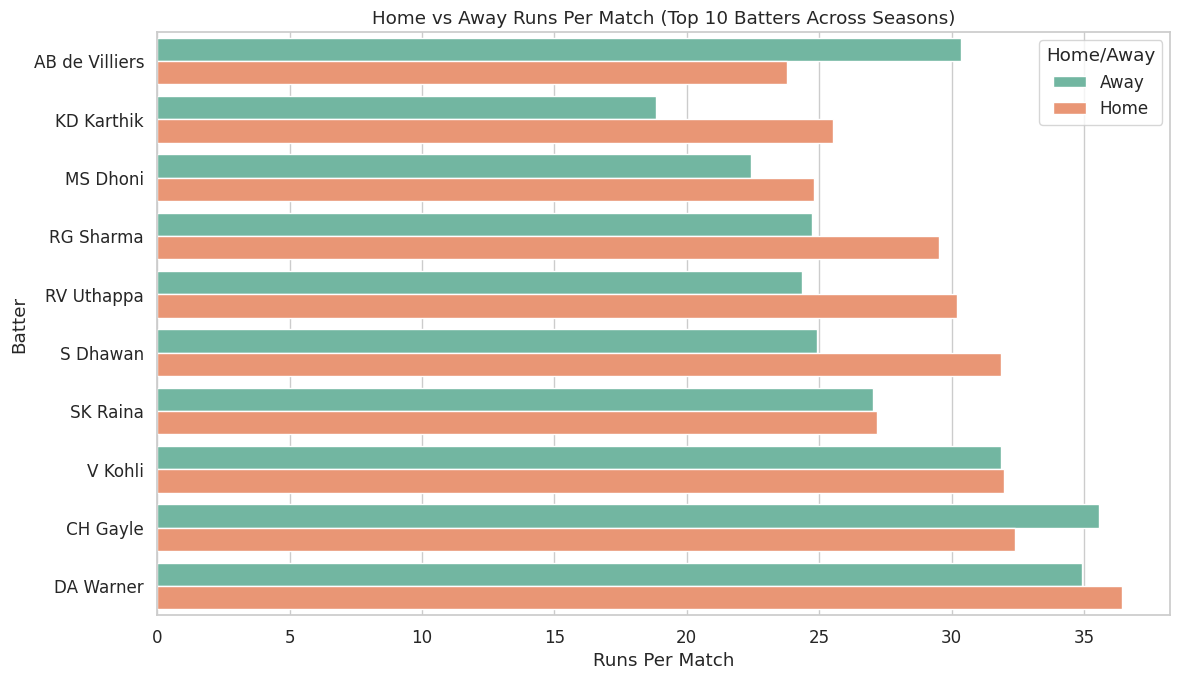

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(
    data=filtered_stats,
    x='runs_per_match',
    y='batter',
    hue='home_away',
    palette='Set2',
    ci=None
)

plt.title('Home vs Away Runs Per Match (Top 10 Batters Across Seasons)')
plt.xlabel('Runs Per Match')
plt.ylabel('Batter')
plt.legend(title='Home/Away')
plt.tight_layout()
plt.show()


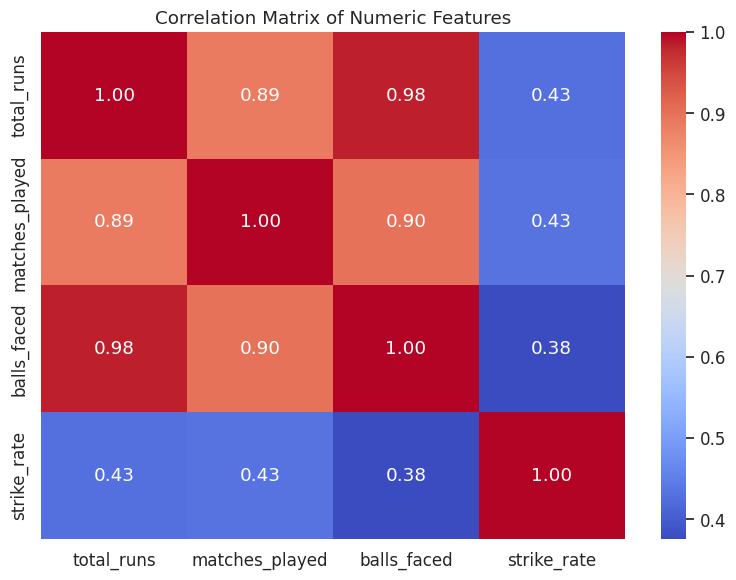

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned df_del here
# df_del = pd.read_csv('path/to/your/cleaned_df_del.csv')

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Heatmap: Correlation matrix

# Aggregate data at season + player level
player_season_agg = (
    df_del.groupby(['season', 'batter'])
    .agg(
        total_runs=('batsman_runs', 'sum'),
        matches_played=('match_id', pd.Series.nunique),
        balls_faced=('ball', 'count')
    )
    .reset_index()
)

# Calculate strike rate
player_season_agg['strike_rate'] = player_season_agg['total_runs'] / player_season_agg['balls_faced'] * 100

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = player_season_agg[['total_runs', 'matches_played', 'balls_faced', 'strike_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


/tmp/ipython-input-71-1372283431.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


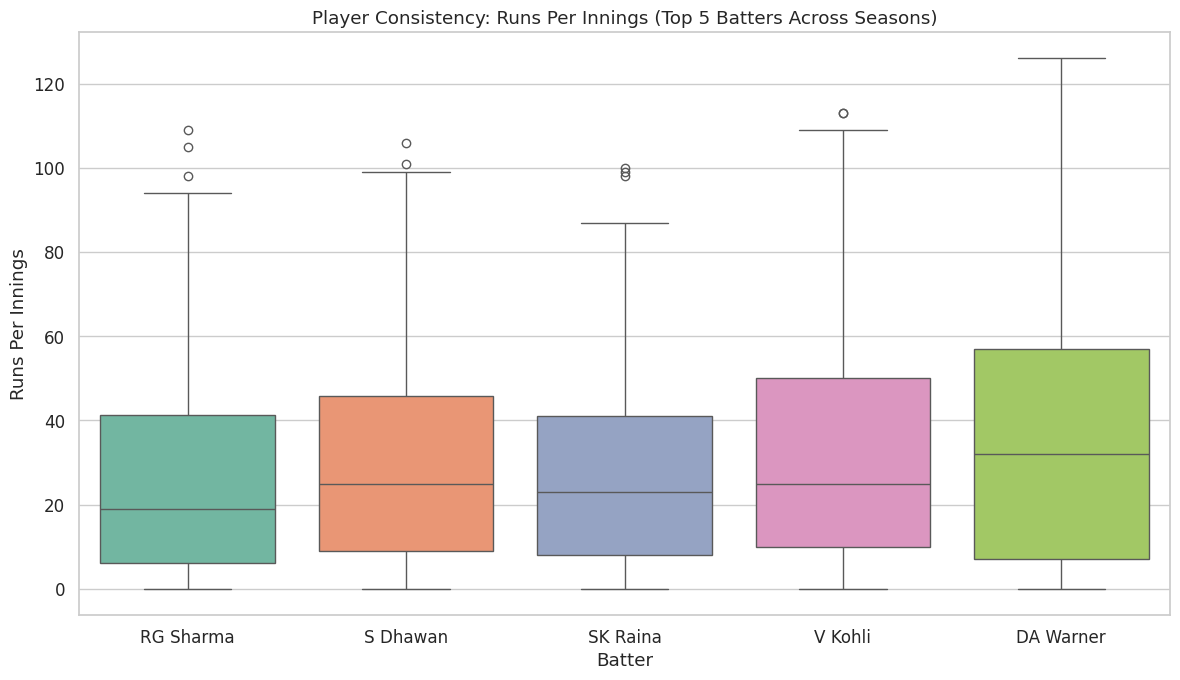

In [71]:
# Player consistency: Boxplots of runs per innings for top 5 players

# Aggregate runs per innings per player
innings_runs = (
    df_del.groupby(['season', 'batter', 'match_id', 'inning'])
    .agg(runs_in_innings=('batsman_runs', 'sum'))
    .reset_index()
)

# Identify top 5 batters by cumulative runs
top_5_batters = (
    df_del.groupby('batter')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Filter data for top 5 batters
innings_runs_top5 = innings_runs[innings_runs['batter'].isin(top_5_batters)]

# Plot boxplots
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='batter',
    y='runs_in_innings',
    data=innings_runs_top5,
    palette='Set2'
)
plt.title('Player Consistency: Runs Per Innings (Top 5 Batters Across Seasons)')
plt.xlabel('Batter')
plt.ylabel('Runs Per Innings')
plt.tight_layout()
plt.show()

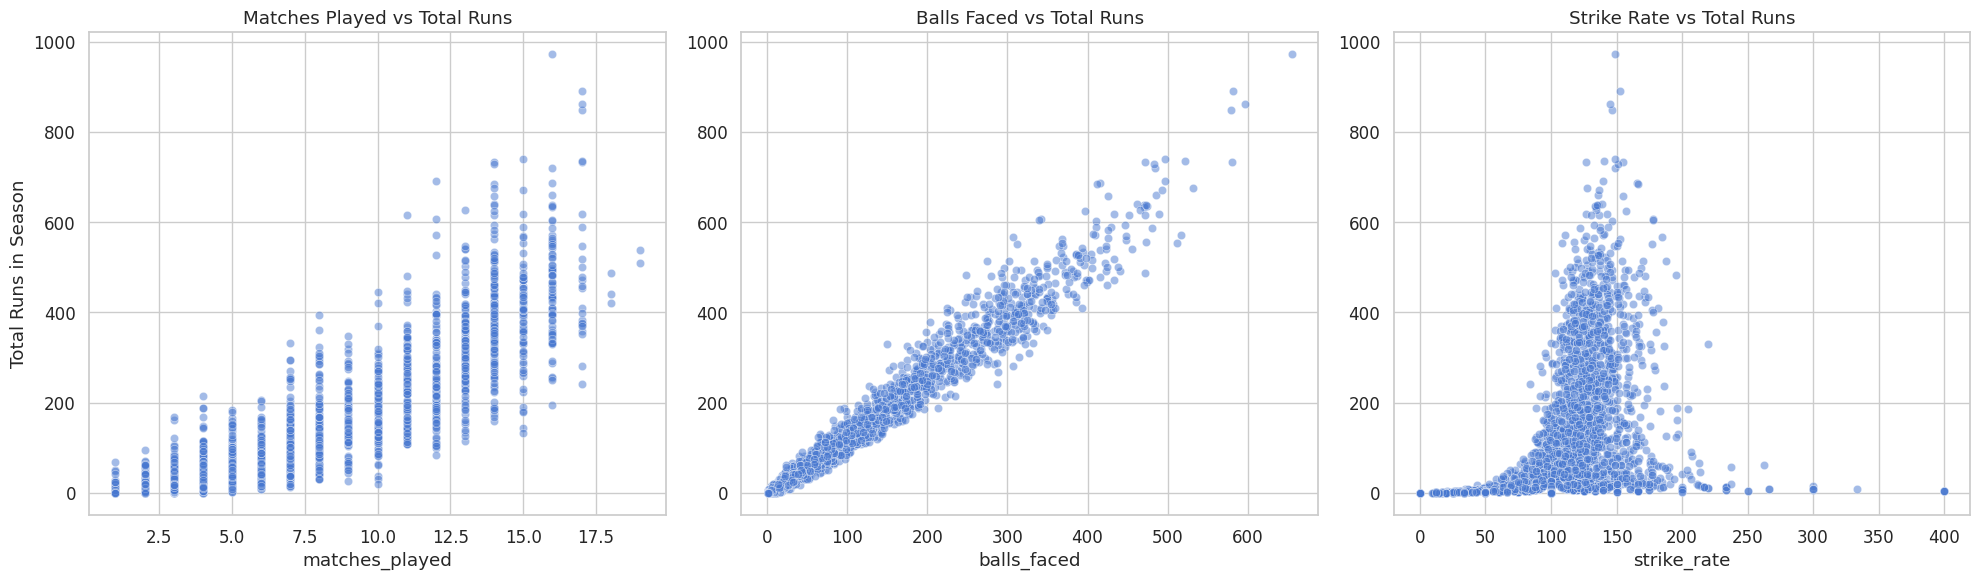

In [72]:
# Scatter plot Matches Played vs Total Runs, Balls Faced vs Total Runs, Strike Rate vs Total Runs
import matplotlib.pyplot as plt
import seaborn as sns


# Some satter plots
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Features to plot
features_to_plot = ['matches_played', 'balls_faced', 'strike_rate']
titles = ['Matches Played vs Total Runs', 'Balls Faced vs Total Runs', 'Strike Rate vs Total Runs']

# Create horizontal subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(
        x=feature,
        y='total_runs',
        data=player_season_agg,
        alpha=0.5,
        ax=axes[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Runs in Season' if i == 0 else '')

plt.tight_layout()
plt.show()



## 🛠️ Feature Engineering

In [73]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          260920 non-null  int64         
 1   inning            260920 non-null  int64         
 2   batting_team      260920 non-null  object        
 3   bowling_team      260920 non-null  object        
 4   over              260920 non-null  int64         
 5   ball              260920 non-null  int64         
 6   batter            260920 non-null  object        
 7   bowler            260920 non-null  object        
 8   non_striker       260920 non-null  object        
 9   batsman_runs      260920 non-null  int64         
 10  extra_runs        260920 non-null  int64         
 11  total_runs        260920 non-null  int64         
 12  extras_type       260920 non-null  object        
 13  is_wicket         260920 non-null  int64         
 14  play

In [74]:
import pandas as pd

# Since we are predicting runs scored per season, lets convert the data into per season data - each row ia for a season

# Player-season aggregation
player_season = (
    df_del.groupby(['season', 'batter', 'batting_team'])
    .agg(
        total_runs=('batsman_runs', 'sum'),
        matches_played=('match_id', pd.Series.nunique),
        balls_faced=('ball', 'count')
    )
    .reset_index()
)


In [75]:
# 2️⃣ Calculate strike rate
player_season['strike_rate'] = (player_season['total_runs'] / player_season['balls_faced']) * 100

# 3️⃣ Add previous season matches played
prev_matches = player_season[['season', 'batter', 'matches_played']].copy()
prev_matches['season'] += 1
prev_matches.rename(columns={'matches_played': 'previous_season_matches_played'}, inplace=True)

player_season = player_season.merge(
    prev_matches,
    on=['season', 'batter'],
    how='left'
)
player_season['previous_season_matches_played'] = player_season['previous_season_matches_played'].fillna(0)

In [76]:
# 4️⃣ (Optional) One-hot encode batting_team
player_season = pd.get_dummies(player_season, columns=['batting_team'], drop_first=True)

# Display to inspect
player_season.head()

,season,batter,total_runs,matches_played,balls_faced,strike_rate,previous_season_matches_played,batting_team_Deccan Chargers,batting_team_Delhi Capitals,batting_team_Delhi Daredevils,...,batting_team_Lucknow Super Giants,batting_team_Mumbai Indians,batting_team_Pune Warriors,batting_team_Punjab Kings,batting_team_Rajasthan Royals,batting_team_Rising Pune Supergiant,batting_team_Rising Pune Supergiants,batting_team_Royal Challengers Bangalore,batting_team_Royal Challengers Bengaluru,batting_team_Sunrisers Hyderabad
0,2008,A Chopra,42,5,55,76.363636,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2008,A Kumble,13,4,17,76.470588,0.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2008,A Mishra,37,3,42,88.095238,0.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2008,A Mukund,0,1,1,0.000000,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2008,A Nehra,3,3,13,23.076923,0.0,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [77]:
player_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   season                                    2617 non-null   int64  
 1   batter                                    2617 non-null   object 
 2   total_runs                                2617 non-null   int64  
 3   matches_played                            2617 non-null   int64  
 4   balls_faced                               2617 non-null   int64  
 5   strike_rate                               2617 non-null   float64
 6   previous_season_matches_played            2617 non-null   float64
 7   batting_team_Deccan Chargers              2617 non-null   bool   
 8   batting_team_Delhi Capitals               2617 non-null   bool   
 9   batting_team_Delhi Daredevils             2617 non-null   bool   
 10  batting_team_Gujarat Lions          

## 🤖 Baseline Modeling

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features and target
feature_cols = [col for col in player_season.columns if col not in ['season', 'batter', 'total_runs']]
X = player_season[feature_cols]
y = player_season['total_runs']


In [79]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f} runs")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} runs")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 15.56 runs
Root Mean Squared Error (RMSE): 24.53 runs
R^2 Score: 0.98


**Interpretation:**
The baseline Linear Regression model achieved an MAE of ~15.5, indicating that predictions are on average within 15.5 runs of the true season total per player. An RMSE of ~24.5 shows low variability in prediction errors. The R² score of 0.98 indicates that 98% of the variance in player seasonal runs is explained by the features used, demonstrating that `matches_played`, `balls_faced`, and `strike_rate` are strong predictors for the task.


## 🗂️ Project EDA and Data Cleaning Summary

We started by cleaning the IPL ball-by-ball dataset:
- Removed duplicate rows.
- Handled missing values (`dismissal_kind`, `player_dismissed`, etc. set to `'None'`).
- Converted the `date` column to datetime.
- Verified distributions and consistency across columns.

Since our goal is to **predict total runs scored by a player in a season**, we **transformed our dataset** to a **player-season level**, engineering features like:
- `matches_played`
- `balls_faced`
- `strike_rate`
- `previous_season_matches_played`
- `home_away` classification and runs per match (for advanced analysis).

These steps ensured our dataset was **clean, relevant, and ready for modeling.**

---

## 📊 EDA and Visualizations

To understand patterns in the data and relationships with our target variable, we performed the following visualizations:

✅ **Distribution Visualizations:**
- Histogram and boxplot of `batsman_runs` per ball to understand player scoring patterns.

✅ **Player Performance Analysis:**
- Top 10 batters by total runs scored across seasons.
- Boxplots of runs scored per innings for the top 5 players to assess consistency.

✅ **Season and Matches Analysis:**
- Matches played per season to see participation trends.
- Previous season matches vs current season runs to check potential correlations.
- Top venues by matches hosted.

✅ **Dismissal Patterns:**
- Distribution of dismissal types across seasons.

✅ **Home vs Away Performance:**
- Total home vs away runs for top 10 players.
- Home vs away runs per match for fair comparisons.

✅ **Feature Relationship Analysis:**
- Correlation heatmap of `matches_played`, `balls_faced`, `strike_rate`, and `total_runs`.
- Scatter plots:
    - Matches played vs total runs
    - Balls faced vs total runs
    - Strike rate vs total runs
    - Previous season matches played vs total runs

These visualizations **helped us confirm which features are meaningful for modeling player runs in a season.**

---

## 🤖 Baseline Modeling

Since our target is **continuous (total runs)**, we used **Linear Regression as a baseline regression model**.

**Features Used:**
- `matches_played`
- `balls_faced`
- `strike_rate`
- `previous_season_matches_played`
- (Optional: one-hot encoded `batting_team`)

**Evaluation Metrics:**
- **MAE (Mean Absolute Error):** Shows the average error in predicted runs per player-season.
- **RMSE (Root Mean Squared Error):** Penalizes larger errors.
- **R² Score:** Indicates the proportion of variance explained by our model.

**Results:**
- **MAE:** ~15.5 runs
- **RMSE:** ~24.5 runs
- **R²:** 0.98

**Interpretation:**
The model predicts player seasonal runs within ~15.5 runs on average, with high accuracy (98% variance explained), demonstrating that features like `matches_played`, `balls_faced`, and `strike_rate` are strong predictors for this task.

---

These steps complete **EDA and baseline modeling for our capstone project**, ensuring our analysis is data-driven, clear, and directly aligned with the goal of **predicting IPL player seasonal runs**.

